In [1026]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(123)
sns.set_style('white')
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

In [1027]:
tr = pd.read_csv('data/trainset.csv')
te = pd.read_csv('data/testset_final.csv')
#tr = pd.read_csv('/kaggle/input/kmu-ml/trainset.csv')
#te = pd.read_csv('/kaggle/input/kmu-ml/testset_final.csv')

te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4244 entries, 0 to 4243
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SEQ         4244 non-null   object 
 1   접수일         4244 non-null   object 
 2   접수시각        900 non-null    object 
 3   장기서비스여부     4244 non-null   int64  
 4   최초서비스일      4244 non-null   object 
 5   전체회차        4244 non-null   int64  
 6   현재회차        4244 non-null   int64  
 7   서비스일자       4244 non-null   object 
 8   서비스시작시간     4244 non-null   object 
 9   서비스종료시간     4244 non-null   object 
 10  기존고객여부      4244 non-null   int64  
 11  결재형태        4238 non-null   object 
 12  서비스주소       4244 non-null   object 
 13  주거형태        4244 non-null   object 
 14  평수          2946 non-null   object 
 15  고객가입일       4084 non-null   object 
 16  반려동물        3868 non-null   object 
 17  부재중여부       2946 non-null   float64
 18  우선청소        2381 non-null   object 
 19  쿠폰사용여부      4244 non-null  

In [1028]:
drop_col = ['매니저최초서비스일', '접수시각']
tr.매니저생년월일 = tr.매니저생년월일.str[:4]
df = pd.concat([tr,te])
df.info()
df = df.drop(columns=drop_col)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27253 entries, 0 to 4243
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SEQ         27253 non-null  object 
 1   접수일         27253 non-null  object 
 2   접수시각        4013 non-null   object 
 3   장기서비스여부     27253 non-null  int64  
 4   최초서비스일      27253 non-null  object 
 5   전체회차        27253 non-null  int64  
 6   현재회차        27253 non-null  int64  
 7   서비스일자       27253 non-null  object 
 8   서비스시작시간     27253 non-null  object 
 9   서비스종료시간     27253 non-null  object 
 10  기존고객여부      27253 non-null  int64  
 11  결재형태        27247 non-null  object 
 12  서비스주소       27253 non-null  object 
 13  주거형태        27253 non-null  object 
 14  평수          16802 non-null  object 
 15  고객가입일       27093 non-null  object 
 16  반려동물        24102 non-null  object 
 17  부재중여부       16802 non-null  float64
 18  우선청소        13360 non-null  object 
 19  쿠폰사용여부      27253 non-null

In [1029]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27253 entries, 0 to 4243
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SEQ         27253 non-null  object 
 1   접수일         27253 non-null  object 
 2   장기서비스여부     27253 non-null  int64  
 3   최초서비스일      27253 non-null  object 
 4   전체회차        27253 non-null  int64  
 5   현재회차        27253 non-null  int64  
 6   서비스일자       27253 non-null  object 
 7   서비스시작시간     27253 non-null  object 
 8   서비스종료시간     27253 non-null  object 
 9   기존고객여부      27253 non-null  int64  
 10  결재형태        27247 non-null  object 
 11  서비스주소       27253 non-null  object 
 12  주거형태        27253 non-null  object 
 13  평수          16802 non-null  object 
 14  고객가입일       27093 non-null  object 
 15  반려동물        24102 non-null  object 
 16  부재중여부       16802 non-null  float64
 17  우선청소        13360 non-null  object 
 18  쿠폰사용여부      27253 non-null  int64  
 19  매니저생년월일     27253 non-null

In [1030]:
df['접수일'] = pd.to_datetime(df['접수일'])
df['최초서비스일'] = pd.to_datetime(df['최초서비스일'])
df['서비스일자'] = pd.to_datetime(df['서비스일자'])
df['고객가입일'] = pd.to_datetime(df['고객가입일'])
df['서비스시작시간'] = pd.to_datetime(df['서비스시작시간'])
df['서비스종료시간'] = pd.to_datetime(df['서비스종료시간'])
df['매니저최초가입일'] = pd.to_datetime(df['매니저최초가입일']).fillna((datetime.today()))

In [1031]:
my_dict = {}
my_dict['접수년'] = df['접수일'].dt.year
my_dict['접수월'] = df['접수일'].dt.month
my_dict['접수일'] = df['접수일'].dt.day
my_dict['접수분기'] = df['접수일'].dt.quarter
my_dict['접수요일'] = df['접수일'].dt.weekday
my_dict['최초서비스차이'] = (df['최초서비스일']-df['접수일']).dt.days
my_dict['서비스년'] = df['서비스일자'].dt.year
my_dict['서비스월'] = df['서비스일자'].dt.month
my_dict['서비스일'] = df['서비스일자'].dt.day
my_dict['서비스분기'] = df['서비스일자'].dt.quarter
my_dict['서비스요일'] = df['서비스일자'].dt.weekday
my_dict['접수일서비스일차이'] = (df['서비스일자']-df['접수일']).dt.days
my_dict['가입일수'] = (datetime.today() - pd.to_datetime(df['고객가입일'])).dt.days.fillna(0)
my_dict['가입년차'] = (my_dict['가입일수']/365).astype('int')
my_dict['서비스시작시간'] = df['서비스시작시간'].dt.hour
my_dict['서비스종료시간'] = df['서비스종료시간'].dt.hour
my_dict['서비스시간'] = (my_dict['서비스종료시간'] - my_dict['서비스시작시간'])
my_dict['매니저경력'] = (datetime.today() - df['매니저최초가입일']).dt.days.fillna(0)
my_dict['매니저연차'] = (my_dict['매니저경력']/365).astype('int')

my_dict = pd.DataFrame(my_dict)
my_dict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27253 entries, 0 to 4243
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   접수년        27253 non-null  int64  
 1   접수월        27253 non-null  int64  
 2   접수일        27253 non-null  int64  
 3   접수분기       27253 non-null  int64  
 4   접수요일       27253 non-null  int64  
 5   최초서비스차이    27253 non-null  int64  
 6   서비스년       27253 non-null  int64  
 7   서비스월       27253 non-null  int64  
 8   서비스일       27253 non-null  int64  
 9   서비스분기      27253 non-null  int64  
 10  서비스요일      27253 non-null  int64  
 11  접수일서비스일차이  27253 non-null  int64  
 12  가입일수       27253 non-null  float64
 13  가입년차       27253 non-null  int64  
 14  서비스시작시간    27253 non-null  int64  
 15  서비스종료시간    27253 non-null  int64  
 16  서비스시간      27253 non-null  int64  
 17  매니저경력      27253 non-null  int64  
 18  매니저연차      27253 non-null  int64  
dtypes: float64(1), int64(18)
memory usage: 4.2 MB


In [1032]:
df_dum_class = pd.get_dummies(my_dict, columns = ['접수년', '접수분기', '접수요일', 
                                                  '서비스년', '서비스분기', '서비스요일', '서비스시간'])
df_dum_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27253 entries, 0 to 4243
Data columns (total 48 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   접수월        27253 non-null  int64  
 1   접수일        27253 non-null  int64  
 2   최초서비스차이    27253 non-null  int64  
 3   서비스월       27253 non-null  int64  
 4   서비스일       27253 non-null  int64  
 5   접수일서비스일차이  27253 non-null  int64  
 6   가입일수       27253 non-null  float64
 7   가입년차       27253 non-null  int64  
 8   서비스시작시간    27253 non-null  int64  
 9   서비스종료시간    27253 non-null  int64  
 10  매니저경력      27253 non-null  int64  
 11  매니저연차      27253 non-null  int64  
 12  접수년_2019   27253 non-null  uint8  
 13  접수년_2020   27253 non-null  uint8  
 14  접수년_2021   27253 non-null  uint8  
 15  접수분기_1     27253 non-null  uint8  
 16  접수분기_2     27253 non-null  uint8  
 17  접수분기_3     27253 non-null  uint8  
 18  접수분기_4     27253 non-null  uint8  
 19  접수요일_0     27253 non-null  uint8  
 20  접수요일_1 

In [1033]:
drop_col = ['접수년', '접수월', '접수일', '접수분기', '서비스년', '서비스월', '서비스일', '서비스분기', 
'최초서비스차이', '접수일서비스일차이', '가입일수', '가입년차', '서비스시작시간', '서비스종료시간', '매니저경력', '매니저연차']

my_dict = my_dict.drop(columns=drop_col)

my_dict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27253 entries, 0 to 4243
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   접수요일    27253 non-null  int64
 1   서비스요일   27253 non-null  int64
 2   서비스시간   27253 non-null  int64
dtypes: int64(3)
memory usage: 851.7 KB


In [1034]:
my_dict = pd.concat([my_dict, df_dum_class], axis=1) # column bind

my_dict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27253 entries, 0 to 4243
Data columns (total 51 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   접수요일       27253 non-null  int64  
 1   서비스요일      27253 non-null  int64  
 2   서비스시간      27253 non-null  int64  
 3   접수월        27253 non-null  int64  
 4   접수일        27253 non-null  int64  
 5   최초서비스차이    27253 non-null  int64  
 6   서비스월       27253 non-null  int64  
 7   서비스일       27253 non-null  int64  
 8   접수일서비스일차이  27253 non-null  int64  
 9   가입일수       27253 non-null  float64
 10  가입년차       27253 non-null  int64  
 11  서비스시작시간    27253 non-null  int64  
 12  서비스종료시간    27253 non-null  int64  
 13  매니저경력      27253 non-null  int64  
 14  매니저연차      27253 non-null  int64  
 15  접수년_2019   27253 non-null  uint8  
 16  접수년_2020   27253 non-null  uint8  
 17  접수년_2021   27253 non-null  uint8  
 18  접수분기_1     27253 non-null  uint8  
 19  접수분기_2     27253 non-null  uint8  
 20  접수분기_3 

In [1035]:
my_dict.head()

,접수요일,서비스요일,서비스시간,접수월,접수일,최초서비스차이,서비스월,서비스일,접수일서비스일차이,가입일수,...,서비스요일_5,서비스요일_6,서비스시간_2,서비스시간_3,서비스시간_4,서비스시간_5,서비스시간_6,서비스시간_7,서비스시간_8,서비스시간_9
0,1,0,4,7,9,6,7,29,20,1384.0,...,0,0,0,0,1,0,0,0,0,0
1,4,1,6,7,12,3,8,20,39,1355.0,...,0,0,0,0,0,0,1,0,0,0
2,2,4,4,11,18,5,12,11,23,843.0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,5,11,9,0,11,30,21,1094.0,...,0,0,0,0,0,1,0,0,0,0
4,1,1,4,2,25,35,4,7,42,1233.0,...,0,0,0,0,1,0,0,0,0,0


In [1036]:
non_col = [0,1,2,3,4]
my_dict['서비스평일'] = my_dict.서비스요일.isin(non_col).astype('int')

non_col = [5,6]
my_dict['서비스주말'] = my_dict.서비스요일.isin(non_col).astype('int')

non_col = [0,1,2,3,4]
my_dict['접수평일'] = my_dict.접수요일.isin(non_col).astype('int')

non_col = [5,6]
my_dict['접수주말'] = my_dict.접수요일.isin(non_col).astype('int')

In [1037]:
#범주형 데이터
df_cat = df.select_dtypes(['object'])
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27253 entries, 0 to 4243
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SEQ       27253 non-null  object
 1   결재형태      27247 non-null  object
 2   서비스주소     27253 non-null  object
 3   주거형태      27253 non-null  object
 4   평수        16802 non-null  object
 5   반려동물      24102 non-null  object
 6   우선청소      13360 non-null  object
 7   매니저생년월일   27253 non-null  object
 8   매니저사용휴대폰  24024 non-null  object
 9   매니저주소     23009 non-null  object
 10  매니저이동방법   26931 non-null  object
 11  근무가능지역    27253 non-null  object
dtypes: object(12)
memory usage: 2.7+ MB


In [1038]:
col = ['SEQ']
df_cat = df_cat.drop(columns=col)
df_cat.nunique()

결재형태         4
서비스주소       49
주거형태         2
평수           4
반려동물         7
우선청소         5
매니저생년월일     70
매니저사용휴대폰     3
매니저주소       36
매니저이동방법      2
근무가능지역       8
dtype: int64

In [1039]:
# sns.barplot(x=df_cat.columns, y=df_cat.isnull().sum())
# plt.xticks(rotation=90);

In [1040]:
#범주형 결측치 others
df_cat = df_cat.fillna('OTHERS')
df_cat.isnull().sum()

결재형태        0
서비스주소       0
주거형태        0
평수          0
반려동물        0
우선청소        0
매니저생년월일     0
매니저사용휴대폰    0
매니저주소       0
매니저이동방법     0
근무가능지역      0
dtype: int64

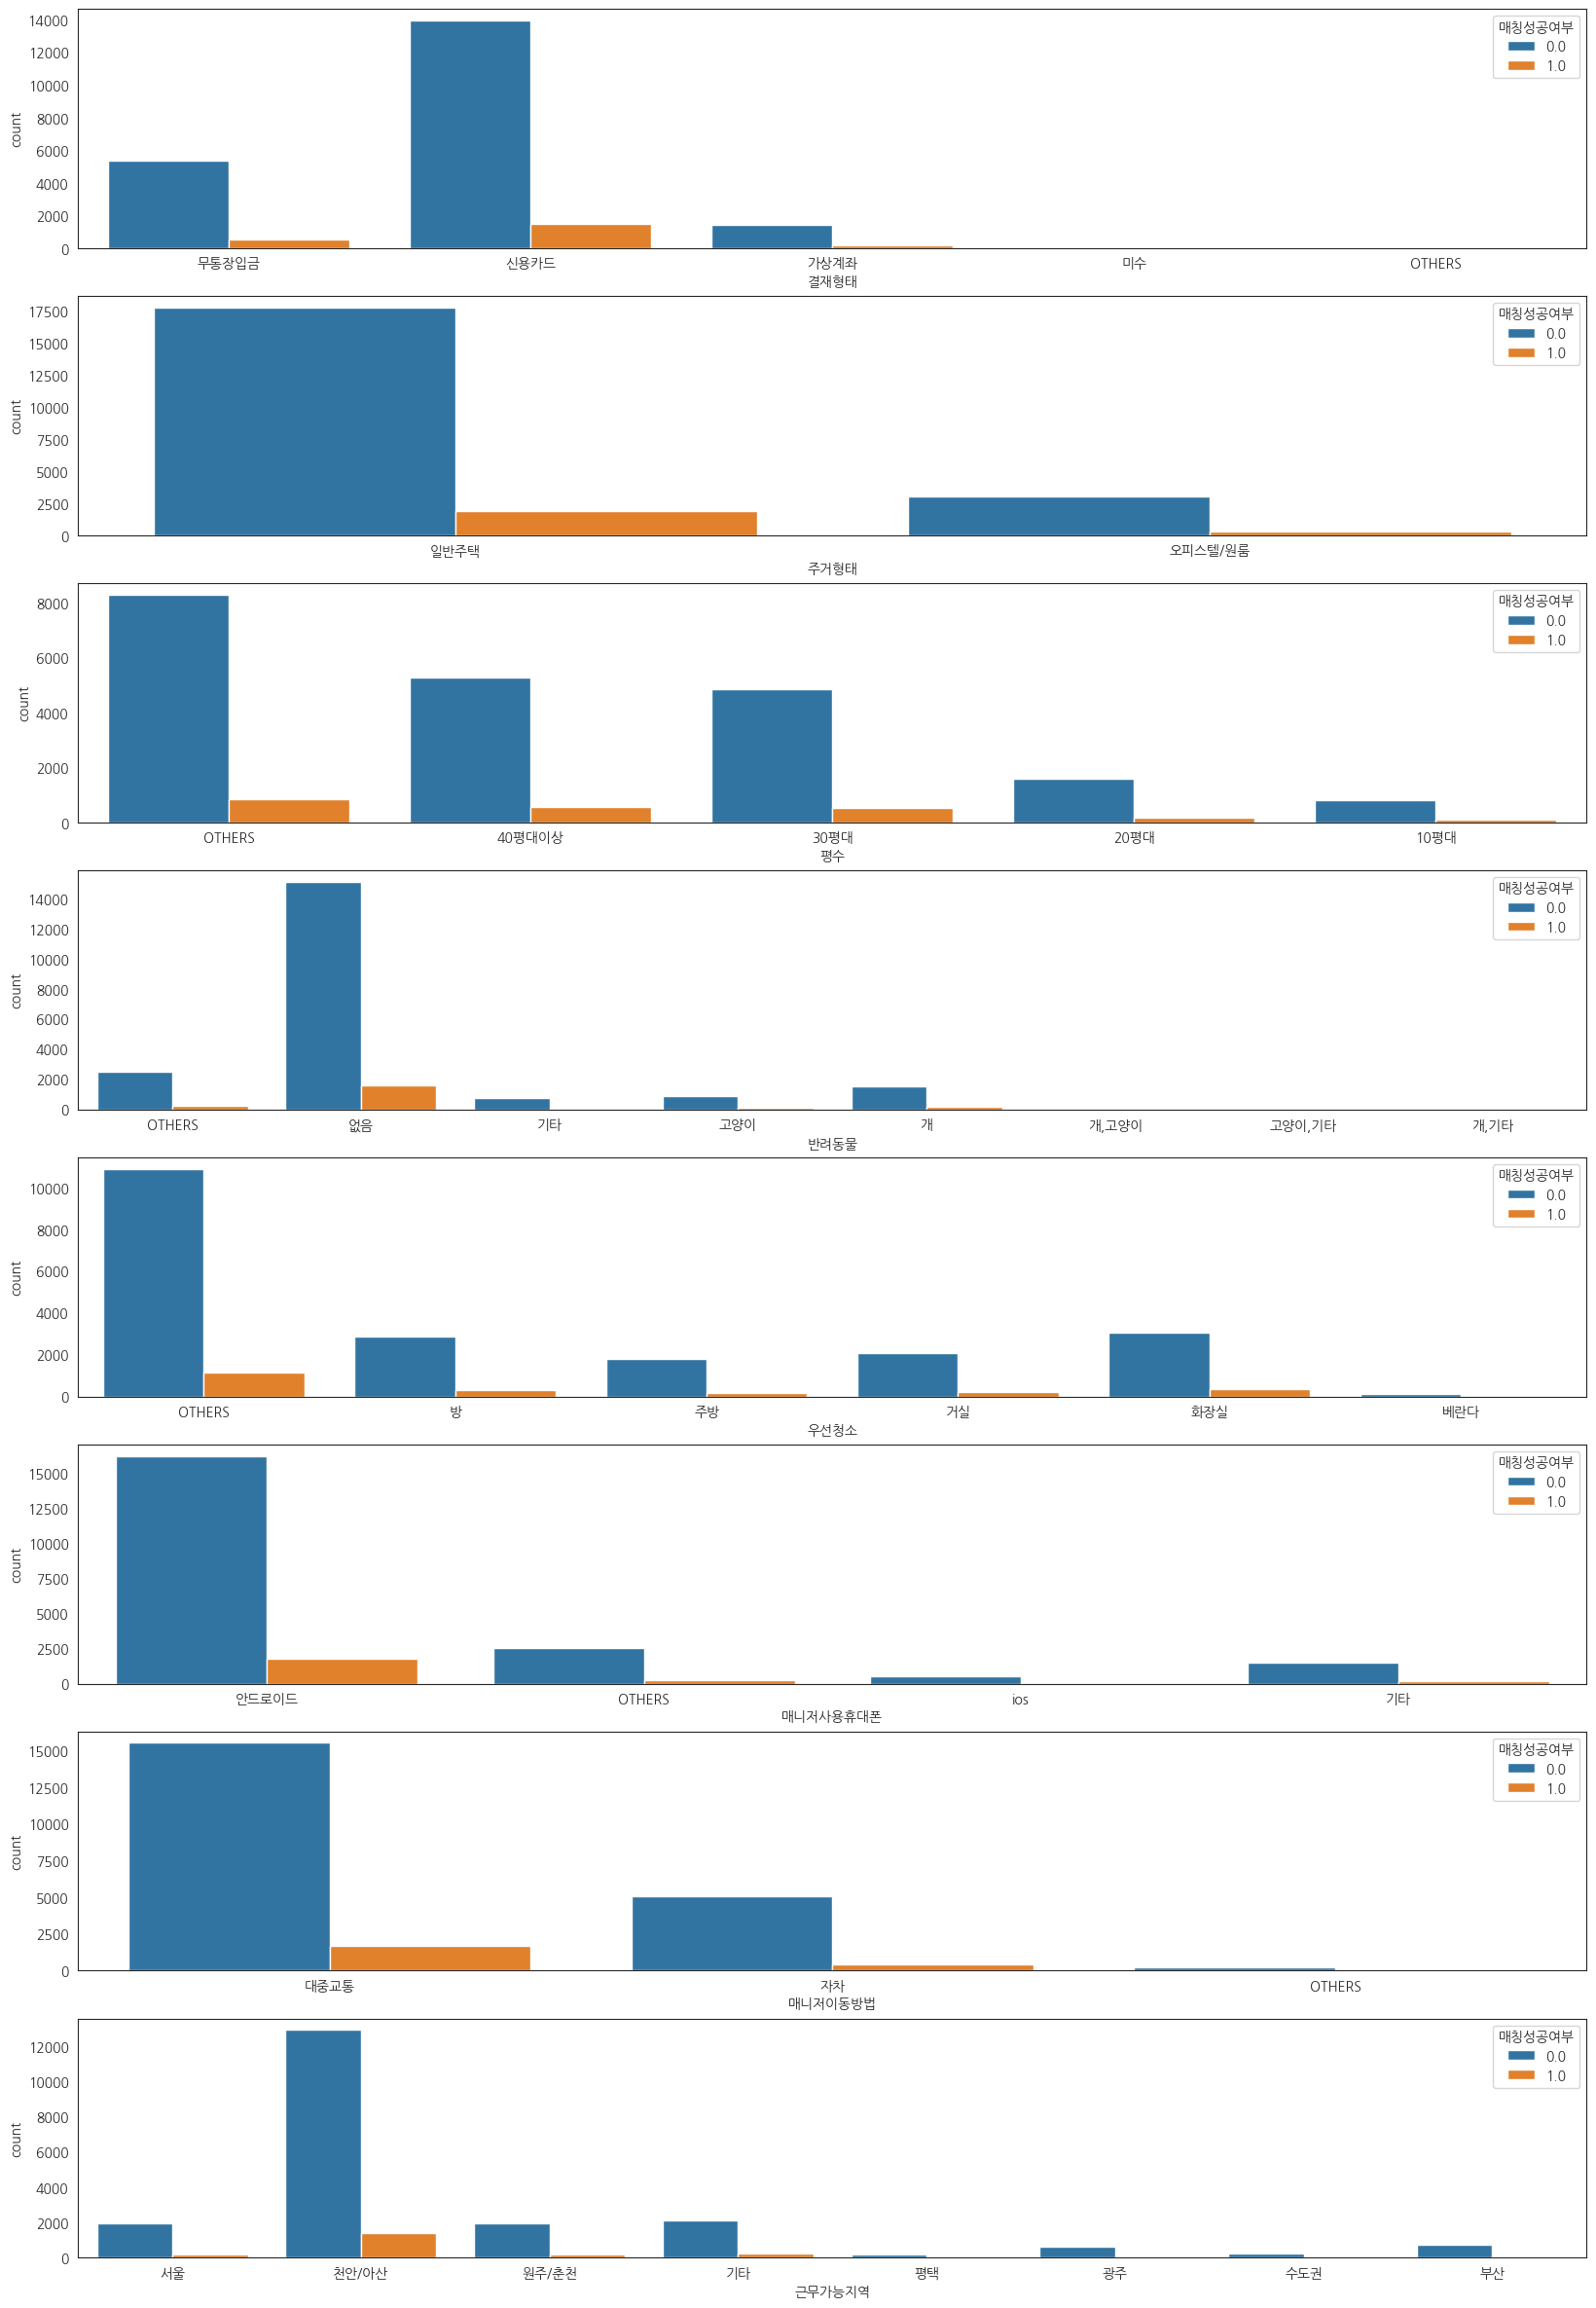

In [1041]:
graph_cols = list(df_cat.columns[(df_cat.nunique()<20).values])
graph_cols

fig, ax = plt.subplots(nrows=len(graph_cols), ncols=1, figsize=(20,30))
for i, a in zip(graph_cols, ax):
    sns.countplot(x=i, data=df_cat, hue=df['매칭성공여부'], ax=a)

In [1042]:
# - 기본 원-핫
# - 10개 이상 바이너리 encoding
# - 너무 많으면 mean encoding

# 결재형태         4
# 서비스주소       49 : mean
# 주거형태         2
# 평수           4
# 반려동물         7
# 우선청소         5
# 매니저생년월일     70 : mean
# 매니저사용휴대폰     3
# 매니저이동방법      2
# 근무가능지역       8
#====================================

In [1043]:
df_cat['결재형태'].unique()

array(['무통장입금', '신용카드', '가상계좌', '미수', 'OTHERS'], dtype=object)

In [1044]:
my_dict['신용카드'] = (df_cat['결재형태'] == '신용카드').astype('int')
my_dict['무통장입금']  = (df_cat['결재형태'] == '무통장입금').astype('int')
my_dict['가상계좌']  = (df_cat['결재형태'] == '가상계좌').astype('int')
my_dict['미수']  = (df_cat['결재형태'] == '미수').astype('int')
my_dict['결제형태_파악불가']  = (df_cat['결재형태'] == 'OTHERS').astype('int')

In [1045]:
df_cat['서비스주소'].unique()

array(['충남 천안시', '서울 강서구', '충남 아산시', '강원 원주시', '광주 북구', '서울 은평구',
       '서울 용산구', '서울 강동구', '서울 강남구', '경기 평택시', '강원 춘천시', '경기 성남시',
       '서울 영등포구', '서울 금천구', '광주 남구', '서울 동작구', '부산 강서구', '광주 광산구',
       '광주 서구', '서울 동대문구', '서울 관악구', '경기 의정부시', '서울 성동구', '부산 연제구',
       '서울 중구', '서울 성북구', '서울 서초구', '경기 안성시', '서울 강북구', '경남 창원시',
       '서울 마포구', '부산 해운대구', '광주 동구', '부산 사하구', '서울 서대문구', '서울 종로구',
       '서울 도봉구', '부산 동래구', '서울 노원구', '부산 동구', '서울 중랑구', '서울 구로구', '부산 북구',
       '경기 화성시', '서울 광진구', '서울 송파구', '부산 부산진구', '부산 금정구', '부산 사상구'],
      dtype=object)

In [1046]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27253 entries, 0 to 4243
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   결재형태      27253 non-null  object
 1   서비스주소     27253 non-null  object
 2   주거형태      27253 non-null  object
 3   평수        27253 non-null  object
 4   반려동물      27253 non-null  object
 5   우선청소      27253 non-null  object
 6   매니저생년월일   27253 non-null  object
 7   매니저사용휴대폰  27253 non-null  object
 8   매니저주소     27253 non-null  object
 9   매니저이동방법   27253 non-null  object
 10  근무가능지역    27253 non-null  object
dtypes: object(11)
memory usage: 2.5+ MB


In [1047]:
# df_cat['매칭성공여부'] = df['매칭성공여부']
# df_cat.info()

In [1048]:
#주거형태
df_cat['주거형태'].unique()

my_dict['일반주택'] = (df_cat['주거형태']=='일반주택').astype('int')
my_dict['오피스텔/원룸'] = (df_cat['주거형태']=='오피스텔/원룸').astype('int')

In [1049]:
#평수
df_cat['평수'].unique()
my_dict['10평대'] = (df_cat['평수']=='10평대').astype('int')
my_dict['20평대'] = (df_cat['평수']=='20평대').astype('int')
my_dict['30평대'] = (df_cat['평수']=='30평대').astype('int')
my_dict['40평대이상'] = (df_cat['평수']=='40평대이상').astype('int')
my_dict['그외평수'] = (df_cat['평수']=='OTHERS').astype('int')

# df_cat.loc[(df_cat['평수']=='OTHERS'),'평수'] = 5
# df_cat.loc[(df_cat['평수']=='40평대이상'),'평수'] = 4
# df_cat.loc[(df_cat['평수']=='30평대'),'평수'] = 3
# df_cat.loc[(df_cat['평수']=='20평대'),'평수'] = 2
# df_cat.loc[(df_cat['평수']=='10평대'),'평수'] = 1

# my_dict['평수'] = df_cat['평수'].astype('int')

In [1050]:
df_cat['반려동물'].unique()

array(['OTHERS', '없음', '기타', '고양이', '개', '개,고양이', '고양이,기타', '개,기타'],
      dtype=object)

In [1051]:
#반려동물
df_cat['반려동물'].unique()
my_dict['반려동물없음'] = (df_cat['반려동물']=='없음').astype('int')
my_dict['반려동물개'] = (df_cat['반려동물']=='개').astype('int')
my_dict['반려동물고양이'] =(df_cat['반려동물']=='고양이').astype('int')
my_dict['반려동물기타'] =(df_cat['반려동물']=='기타').astype('int')
my_dict['반려동물미응답'] = (df_cat['반려동물']=='OTHERS').astype('int')
my_dict['반려동물개고양이'] = (df_cat['반려동물']=='개,고양이').astype('int')
my_dict['반려동물고양이,기타'] = (df_cat['반려동물']=='고양이,기타').astype('int')
my_dict['반려동물개,기타'] = (df_cat['반려동물']=='개,기타').astype('int')

non_col = ['기타', '고양이', '개', '개,고양이', '고양이,기타', '개,기타']
my_dict['반려동물있음'] = df_cat.반려동물.isin(non_col).astype('int')

In [1052]:
#우선청소
df_cat['우선청소'].unique()
my_dict['화장실'] = (df_cat['우선청소']=='화장실').astype('int')
my_dict['방'] = (df_cat['우선청소']=='방').astype('int')
my_dict['거실'] = (df_cat['우선청소']=='거실').astype('int')
my_dict['주방'] = (df_cat['우선청소']=='주방').astype('int')
my_dict['베란다'] = (df_cat['우선청소']=='베란다').astype('int')
my_dict['이외장소'] = (df_cat['우선청소']=='OTHERS').astype('int') 

In [1053]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27253 entries, 0 to 4243
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   결재형태      27253 non-null  object
 1   서비스주소     27253 non-null  object
 2   주거형태      27253 non-null  object
 3   평수        27253 non-null  object
 4   반려동물      27253 non-null  object
 5   우선청소      27253 non-null  object
 6   매니저생년월일   27253 non-null  object
 7   매니저사용휴대폰  27253 non-null  object
 8   매니저주소     27253 non-null  object
 9   매니저이동방법   27253 non-null  object
 10  근무가능지역    27253 non-null  object
dtypes: object(11)
memory usage: 2.5+ MB


In [1054]:
#int(pd.datetime.now().year)
df_cat['매니저나이'] = (int(pd.datetime.now().year) - df_cat['매니저생년월일'].astype('int'))
my_dict['매니저연령대'] = (df_cat['매니저나이']/10).astype('int')
my_dict['매니저나이'] = df_cat['매니저나이']
#my_dict['매니저나이'].unique()

/tmp/ipykernel_30463/1156595682.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df_cat['매니저나이'] = (int(pd.datetime.now().year) - df_cat['매니저생년월일'].astype('int'))


In [1055]:
my_dict['안드로이드'] = (df_cat['매니저사용휴대폰']=='안드로이드').astype('int')
# my_dict['ios'] = (df_cat['매니저사용휴대폰']=='ios').astype('int')
# my_dict['기타'] = (df_cat['매니저사용휴대폰']=='기타').astype('int')
my_dict['휴대폰미등록'] = (df_cat['매니저사용휴대폰']=='OTHERS').astype('int')

non_col = ['기타', 'ios']
my_dict['기타휴대폰'] = df_cat.매니저사용휴대폰.isin(non_col).astype('int')

In [1056]:
my_dict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27253 entries, 0 to 4243
Data columns (total 87 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   접수요일        27253 non-null  int64  
 1   서비스요일       27253 non-null  int64  
 2   서비스시간       27253 non-null  int64  
 3   접수월         27253 non-null  int64  
 4   접수일         27253 non-null  int64  
 5   최초서비스차이     27253 non-null  int64  
 6   서비스월        27253 non-null  int64  
 7   서비스일        27253 non-null  int64  
 8   접수일서비스일차이   27253 non-null  int64  
 9   가입일수        27253 non-null  float64
 10  가입년차        27253 non-null  int64  
 11  서비스시작시간     27253 non-null  int64  
 12  서비스종료시간     27253 non-null  int64  
 13  매니저경력       27253 non-null  int64  
 14  매니저연차       27253 non-null  int64  
 15  접수년_2019    27253 non-null  uint8  
 16  접수년_2020    27253 non-null  uint8  
 17  접수년_2021    27253 non-null  uint8  
 18  접수분기_1      27253 non-null  uint8  
 19  접수분기_2      27253 non-null

In [1057]:
my_dict['매니저자차'] = (df_cat['매니저이동방법']=='자차').astype('int')
my_dict['매니저대중교통'] = (df_cat['매니저이동방법']=='대중교통').astype('int')
my_dict['매니저그외교통'] = (df_cat['매니저이동방법']=='OTHERS').astype('int')

In [1058]:
df_cat['서비스주소'].unique()

array(['충남 천안시', '서울 강서구', '충남 아산시', '강원 원주시', '광주 북구', '서울 은평구',
       '서울 용산구', '서울 강동구', '서울 강남구', '경기 평택시', '강원 춘천시', '경기 성남시',
       '서울 영등포구', '서울 금천구', '광주 남구', '서울 동작구', '부산 강서구', '광주 광산구',
       '광주 서구', '서울 동대문구', '서울 관악구', '경기 의정부시', '서울 성동구', '부산 연제구',
       '서울 중구', '서울 성북구', '서울 서초구', '경기 안성시', '서울 강북구', '경남 창원시',
       '서울 마포구', '부산 해운대구', '광주 동구', '부산 사하구', '서울 서대문구', '서울 종로구',
       '서울 도봉구', '부산 동래구', '서울 노원구', '부산 동구', '서울 중랑구', '서울 구로구', '부산 북구',
       '경기 화성시', '서울 광진구', '서울 송파구', '부산 부산진구', '부산 금정구', '부산 사상구'],
      dtype=object)

In [1059]:
df_cat['매니저주소'].unique()

array(['서울 양천구', '충남 천안시', '서울 서대문구', '강원 원주시', '충남 아산시', '서울 마포구',
       '서울 영등포구', '서울 송파구', '서울 동작구', '경기 평택시', '서울 관악구', '충남 세종시',
       '강원 춘천시', '서울 중랑구', '광주 동구', '경기 화성시', '서울 노원구', '부산 해운대구',
       '서울 종로구', '서울 강남구', '부산 남구', '서울 서초구', '경기 수원시', '부산 부산진구',
       '광주 남구', '부산 사상구', '부산 수영구', '서울 강북구', '광주 서구', '서울 성동구', '서울 금천구',
       '서울 강동구', '인천 남동구', '서울 구로구', '경남 창원시', '서울 은평구', 'OTHERS'],
      dtype=object)

In [1060]:
my_dict['충남'] = (df_cat['서비스주소'].str.split(expand=True)[0] == '충남').astype('int')
my_dict['서울'] = (df_cat['서비스주소'].str.split(expand=True)[0] == '서울').astype('int')
my_dict['강원'] = (df_cat['서비스주소'].str.split(expand=True)[0] == '강원').astype('int')
my_dict['부산'] = (df_cat['서비스주소'].str.split(expand=True)[0] == '부산').astype('int')
my_dict['광주'] = (df_cat['서비스주소'].str.split(expand=True)[0] == '광주').astype('int')
my_dict['경기'] = (df_cat['서비스주소'].str.split(expand=True)[0] == '경기').astype('int')
my_dict['경남'] = (df_cat['서비스주소'].str.split(expand=True)[0] == '경남').astype('int')
#my_dict['서비스주소'] = df_cat['서비스주소'].map(df_cat.groupby('서비스주소')['매칭성공여부'].mean())

# n_size = df_cat.groupby('서비스주소').size()
# global_mean = df.매칭성공여부.mean()
# alpha = 0.9 # alpha값이 크면 클수록 smooth -> 평균에 가깝게

# def smoothing(n_rows, target_mean):
#     return (target_mean*n_rows + global_mean*alpha) / (n_rows + alpha)

# my_dict['서비스주소'] = df_cat['서비스주소'].map(df_cat.apply(lambda x: smoothing(n_size, df_cat.groupby('서비스주소')['매칭성공여부'].mean()))['서비스주소'])

my_dict['m충남'] = (df_cat['매니저주소'].str.split(expand=True)[0] == '충남').astype('int')
my_dict['m서울'] = (df_cat['매니저주소'].str.split(expand=True)[0] == '서울').astype('int')
my_dict['m강원'] = (df_cat['매니저주소'].str.split(expand=True)[0] == '강원').astype('int')
my_dict['m광주'] = (df_cat['매니저주소'].str.split(expand=True)[0] == '광주').astype('int')
my_dict['m부산'] = (df_cat['매니저주소'].str.split(expand=True)[0] == '부산').astype('int')
my_dict['m경기'] = (df_cat['매니저주소'].str.split(expand=True)[0] == '경기').astype('int')
my_dict['m경남'] = (df_cat['매니저주소'].str.split(expand=True)[0] == '경남').astype('int')
my_dict['m인천'] = (df_cat['매니저주소'].str.split(expand=True)[0] == '인천').astype('int')

my_dict['w천안'] = (df_cat['근무가능지역'].str.split(expand=True)[0] == '천안/아산').astype('int')
my_dict['w기타'] = (df_cat['근무가능지역'].str.split(expand=True)[0] == '기타').astype('int')
my_dict['w서울'] = (df_cat['근무가능지역'].str.split(expand=True)[0] == '서울').astype('int')
my_dict['w원주'] = (df_cat['근무가능지역'].str.split(expand=True)[0] == '원주/춘천').astype('int')
my_dict['w부산'] = (df_cat['근무가능지역'].str.split(expand=True)[0] == '부산').astype('int')
my_dict['w광주'] = (df_cat['근무가능지역'].str.split(expand=True)[0] == '광주').astype('int')
my_dict['w수도권'] = (df_cat['근무가능지역'].str.split(expand=True)[0] == '수도권').astype('int')
my_dict['w평택'] = (df_cat['근무가능지역'].str.split(expand=True)[0] == '평택').astype('int')

# my_dict['근무가능지역'] = df_cat['근무가능지역'].map(df_cat.apply(lambda x: smoothing(n_size, df_cat.groupby('근무가능지역')['매칭성공여부'].mean()))['근무가능지역'])

#my_dict['동일지역거주'] = (df_cat['서비스주소'].str.split(expand=True)[0] == df_cat['매니저주소'].str.split(expand=True)[0]).astype('int')
my_dict['충남매칭'] = (my_dict['w천안'] == my_dict['충남']).astype('int')
my_dict['서울매칭'] = (my_dict['w서울'] == my_dict['서울']).astype('int')
my_dict['강원매칭'] = (my_dict['w원주'] == my_dict['강원']).astype('int')
my_dict['부산매칭'] = (my_dict['w부산'] == my_dict['부산']).astype('int')
my_dict['광주매칭'] = (my_dict['w광주'] == my_dict['광주']).astype('int')
my_dict['경기매칭'] = (my_dict['w평택'] == my_dict['경기']).astype('int')
my_dict['수도권매칭'] = (my_dict['w수도권'] == my_dict['경기']).astype('int')
my_dict['수도권_서울매칭'] = (my_dict['w수도권'] == my_dict['서울']).astype('int')

In [1061]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27253 entries, 0 to 4243
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   SEQ         27253 non-null  object        
 1   접수일         27253 non-null  datetime64[ns]
 2   장기서비스여부     27253 non-null  int64         
 3   최초서비스일      27253 non-null  datetime64[ns]
 4   전체회차        27253 non-null  int64         
 5   현재회차        27253 non-null  int64         
 6   서비스일자       27253 non-null  datetime64[ns]
 7   서비스시작시간     27253 non-null  datetime64[ns]
 8   서비스종료시간     27253 non-null  datetime64[ns]
 9   기존고객여부      27253 non-null  int64         
 10  결재형태        27247 non-null  object        
 11  서비스주소       27253 non-null  object        
 12  주거형태        27253 non-null  object        
 13  평수          16802 non-null  object        
 14  고객가입일       27093 non-null  datetime64[ns]
 15  반려동물        24102 non-null  object        
 16  부재중여부       16802 non-n

In [1062]:
df_num = df.select_dtypes(['float64', 'int64'])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27253 entries, 0 to 4243
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   장기서비스여부     27253 non-null  int64  
 1   전체회차        27253 non-null  int64  
 2   현재회차        27253 non-null  int64  
 3   기존고객여부      27253 non-null  int64  
 4   부재중여부       16802 non-null  float64
 5   쿠폰사용여부      27253 non-null  int64  
 6   매니저성별       27253 non-null  int64  
 7   CS교육이수여부    24025 non-null  float64
 8   청소교육이수여부    24025 non-null  float64
 9   부재중서비스가능여부  27253 non-null  int64  
 10  추천인여부       27253 non-null  int64  
 11  매칭성공여부      23009 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 2.7 MB


In [1063]:
my_dict['CS교육이수']= (df_num['CS교육이수여부']==1).astype('int')
my_dict['CS교육미이수'] = (df_num['CS교육이수여부']==0).astype('int')

my_dict['청소교육이수']= (df_num['청소교육이수여부']==1).astype('int')
my_dict['청소교육미이수'] = (df_num['청소교육이수여부']==0).astype('int')

my_dict['CS교육확인불가'] = (df_num['CS교육이수여부'].isnull()).astype('int')
my_dict['청소교육확인불가'] = (df_num['청소교육이수여부'].isnull()).astype('int')

In [1064]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27253 entries, 0 to 4243
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   장기서비스여부     27253 non-null  int64  
 1   전체회차        27253 non-null  int64  
 2   현재회차        27253 non-null  int64  
 3   기존고객여부      27253 non-null  int64  
 4   부재중여부       16802 non-null  float64
 5   쿠폰사용여부      27253 non-null  int64  
 6   매니저성별       27253 non-null  int64  
 7   CS교육이수여부    24025 non-null  float64
 8   청소교육이수여부    24025 non-null  float64
 9   부재중서비스가능여부  27253 non-null  int64  
 10  추천인여부       27253 non-null  int64  
 11  매칭성공여부      23009 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 2.7 MB


In [1065]:
my_dict['SEQ'] = df['SEQ']
my_dict['장기서비스여부'] = df_num['장기서비스여부']
my_dict['회차'] = df_num['현재회차']/df_num['전체회차']
my_dict['기존고객여부'] = df_num['기존고객여부']
#my_dict['부재중미응답'] = (df_num['부재중여부'].isnull()).astype('int')
#my_dict['부재중여부'] = df['부재중여부'].fillna(0).astype('int')
my_dict['쿠폰사용여부'] = df_num['쿠폰사용여부']
my_dict['매니저성별'] = df_num['매니저성별']
my_dict['부재중서비스가능여부'] = df_num['부재중서비스가능여부'].astype('int')
#my_dict['추천인여부'] = df_num['추천인여부']
my_dict['매칭성공여부'] = df_num['매칭성공여부']

In [1066]:
my_dict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27253 entries, 0 to 4243
Columns: 135 entries, 접수요일 to 매칭성공여부
dtypes: float64(3), int64(95), object(1), uint8(36)
memory usage: 21.7+ MB


In [1067]:
my_dict.head(10)

,접수요일,서비스요일,서비스시간,접수월,접수일,최초서비스차이,서비스월,서비스일,접수일서비스일차이,가입일수,...,CS교육확인불가,청소교육확인불가,SEQ,장기서비스여부,회차,기존고객여부,쿠폰사용여부,매니저성별,부재중서비스가능여부,매칭성공여부
0,1,0,4,7,9,6,7,29,20,1384.0,...,0,0,T06420,1,1.000,1,0,0,1,0.0
1,4,1,6,7,12,3,8,20,39,1355.0,...,0,0,T15430,1,0.750,1,0,0,1,0.0
2,2,4,4,11,18,5,12,11,23,843.0,...,0,0,T23790,1,0.600,1,0,0,0,0.0
3,0,0,5,11,9,0,11,30,21,1094.0,...,0,0,T18740,1,1.000,1,0,0,1,0.0
4,1,1,4,2,25,35,4,7,42,1233.0,...,0,0,T08451,1,1.000,1,0,0,1,1.0
5,3,3,4,9,5,14,10,24,49,1325.0,...,0,0,T10050,1,0.750,1,0,0,1,0.0
6,0,0,4,7,13,7,7,27,14,957.0,...,0,0,T06861,1,0.500,1,0,0,1,0.0
7,1,0,4,10,15,6,12,9,55,1335.0,...,0,0,T21418,1,0.600,1,1,0,0,0.0
8,0,3,4,8,5,3,8,8,3,1305.0,...,0,0,T01980,0,1.000,1,0,0,1,0.0
9,2,2,4,5,27,7,7,1,35,1135.0,...,0,0,T14054,1,0.625,1,0,0,1,0.0


In [1068]:
my_dict.to_csv('save.csv', index=False)

In [1069]:
from sklearn.preprocessing import MinMaxScaler

drop_col = ['SEQ']
my_dict = my_dict.drop(columns=drop_col)

df_norm = (my_dict-my_dict.min())/(my_dict.max()-my_dict.min())
df_norm['SEQ'] = df['SEQ']
df_norm.head()

,접수요일,서비스요일,서비스시간,접수월,접수일,최초서비스차이,서비스월,서비스일,접수일서비스일차이,가입일수,...,CS교육확인불가,청소교육확인불가,장기서비스여부,회차,기존고객여부,쿠폰사용여부,매니저성별,부재중서비스가능여부,매칭성공여부,SEQ
0,0.166667,0.000000,0.285714,0.545455,0.266667,0.099010,0.545455,0.933333,0.175182,0.990694,...,0.0,0.0,1.0,1.000000,1.0,0.0,0.0,1.0,0.0,T06420
1,0.666667,0.166667,0.571429,0.545455,0.366667,0.069307,0.636364,0.633333,0.313869,0.969936,...,0.0,0.0,1.0,0.741379,1.0,0.0,0.0,1.0,0.0,T15430
2,0.333333,0.666667,0.285714,0.909091,0.566667,0.089109,1.000000,0.333333,0.197080,0.603436,...,0.0,0.0,1.0,0.586207,1.0,0.0,0.0,0.0,0.0,T23790
3,0.000000,0.000000,0.428571,0.909091,0.266667,0.039604,0.909091,0.966667,0.182482,0.783107,...,0.0,0.0,1.0,1.000000,1.0,0.0,0.0,1.0,0.0,T18740
4,0.166667,0.166667,0.285714,0.090909,0.800000,0.386139,0.272727,0.200000,0.335766,0.882606,...,0.0,0.0,1.0,1.000000,1.0,0.0,0.0,1.0,1.0,T08451


In [1070]:
# x_train = my_dict[~my_dict['매칭성공여부'].isnull()].drop(columns=['SEQ', '매칭성공여부'])
# x_test = my_dict[my_dict['매칭성공여부'].isnull()].drop(columns=['SEQ','매칭성공여부'])
# y_train= my_dict[~my_dict['매칭성공여부'].isnull()]['매칭성공여부']

x_train = df_norm[~df_norm['매칭성공여부'].isnull()].drop(columns=['SEQ', '매칭성공여부'])
x_test = df_norm[df_norm['매칭성공여부'].isnull()].drop(columns=['SEQ','매칭성공여부'])
y_train= df_norm[~df_norm['매칭성공여부'].isnull()]['매칭성공여부']

In [1071]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23009 entries, 0 to 23008
Columns: 133 entries, 접수요일 to 부재중서비스가능여부
dtypes: float64(133)
memory usage: 23.5 MB


In [1072]:
from imblearn.combine import SMOTETomek 

oversample = SMOTETomek(random_state=42)
x_train_smote, y_train_smote = oversample.fit_resample(x_train, y_train)

In [1073]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score, precision_score, f1_score, fbeta_score
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier # Wrapper-Class
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [1074]:
# colsample_bytree = [0.1, 0.3, 0.4, 0.5, 1.0]
# gamma = [0, 0.1, 1]
# learning_rate = [0.001, 0.05, 0.08, 0.1]
# min_child_weight = [1, 5, 10, 20]
# scale_pos_weight = [0.5, 1, 2, 4, 6]
# subsample = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# n_estimators = [25, 50, 100, 150]
# max_depth = [3, 5, 10, 20, 40, 100]

# param_distributions = dict(
#     colsample_bytree=colsample_bytree,
#     gamma=gamma,
#     learning_rate=learning_rate,
#     min_child_weight=min_child_weight,
#     scale_pos_weight=scale_pos_weight,
#     subsample=subsample,
#     n_estimators=n_estimators,
#     max_depth=max_depth,
# )

max_depth = range(3,10)
min_child_weight = range(1,12)
gamma = [0,1]
subsample = np.arange(0.5, 1, 0.1)#[0.5,0.6,0.7,0.8,0.9,1.0]
colsample_bytree = np.arange(0.5, 1, 0.1)#[0.5,0.6,0.7,0.8,0.9,1.0]
reg_alpha = range(0,100) #[0,10,20,30,40,50,60,70,80,90,100]
reg_lambda = range(0,100) #[0,10,20,30,40,50,60,70,80,90,100]
eta =  np.arange(0, 0.3, 0.1) #[0, 0.1, 0.2]
##
scale_pos_weight = [0.5, 1, 2, 4, 6]
n_estimators = [25, 50, 100, 150, 200, 250, 300]
learning_rate = [0.001, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

param_distributions = dict(
    colsample_bytree=colsample_bytree,
    gamma=gamma,
    learning_rate=learning_rate,
    min_child_weight=min_child_weight,
    scale_pos_weight=scale_pos_weight,
    subsample=subsample,
    n_estimators=n_estimators,
    max_depth=max_depth,
    reg_alpha=reg_alpha,
    reg_lambda=reg_lambda,
    eta=eta
)

model = XGBClassifier(objective= 'binary:logistic', random_state=1, verbosity=1)

grid_search = RandomizedSearchCV(estimator=model,
                                 param_distributions=param_distributions,
                                 scoring='roc_auc', cv=10, n_jobs=-1
                                )
#grid = grid_search.fit(x_train, y_train)
grid = grid_search.fit(x_train_smote, y_train_smote)
print('Optimum parameters', grid.best_params_)

Optimum parameters {'subsample': 0.8999999999999999, 'scale_pos_weight': 6, 'reg_lambda': 21, 'reg_alpha': 7, 'n_estimators': 250, 'min_child_weight': 4, 'max_depth': 6, 'learning_rate': 0.08, 'gamma': 0, 'eta': 0.1, 'colsample_bytree': 0.5}


In [1075]:
grid.best_score_

0.9831594321973292

In [1076]:
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=4, missing=nan,
              monotone_constraints=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [1077]:
grid.best_estimator_.feature_importances_

array([0.00305924, 0.00536865, 0.00256152, 0.00454412, 0.00339783,
       0.00351066, 0.00798774, 0.00709875, 0.00899178, 0.0070461 ,
       0.00668542, 0.00945457, 0.0099008 , 0.00527608, 0.00643041,
       0.01344835, 0.0042787 , 0.00507761, 0.00100557, 0.00860036,
       0.00292646, 0.00181908, 0.00817525, 0.01000987, 0.00917533,
       0.00448306, 0.01133772, 0.00163193, 0.00234765, 0.00988478,
       0.00221903, 0.00426194, 0.00174448, 0.00393947, 0.0109544 ,
       0.00272302, 0.01251146, 0.00687831, 0.00785217, 0.01022991,
       0.00799875, 0.00058968, 0.        , 0.00281916, 0.00523526,
       0.00791459, 0.00198501, 0.00410515, 0.        , 0.        ,
       0.00122583, 0.00178076, 0.00083411, 0.00243265, 0.00130674,
       0.01047283, 0.00457598, 0.00170173, 0.        , 0.        ,
       0.00392868, 0.00265742, 0.00288522, 0.00516216, 0.00285897,
       0.00337042, 0.00495887, 0.00352324, 0.0015314 , 0.00306345,
       0.00371315, 0.00385896, 0.        , 0.        , 0.     

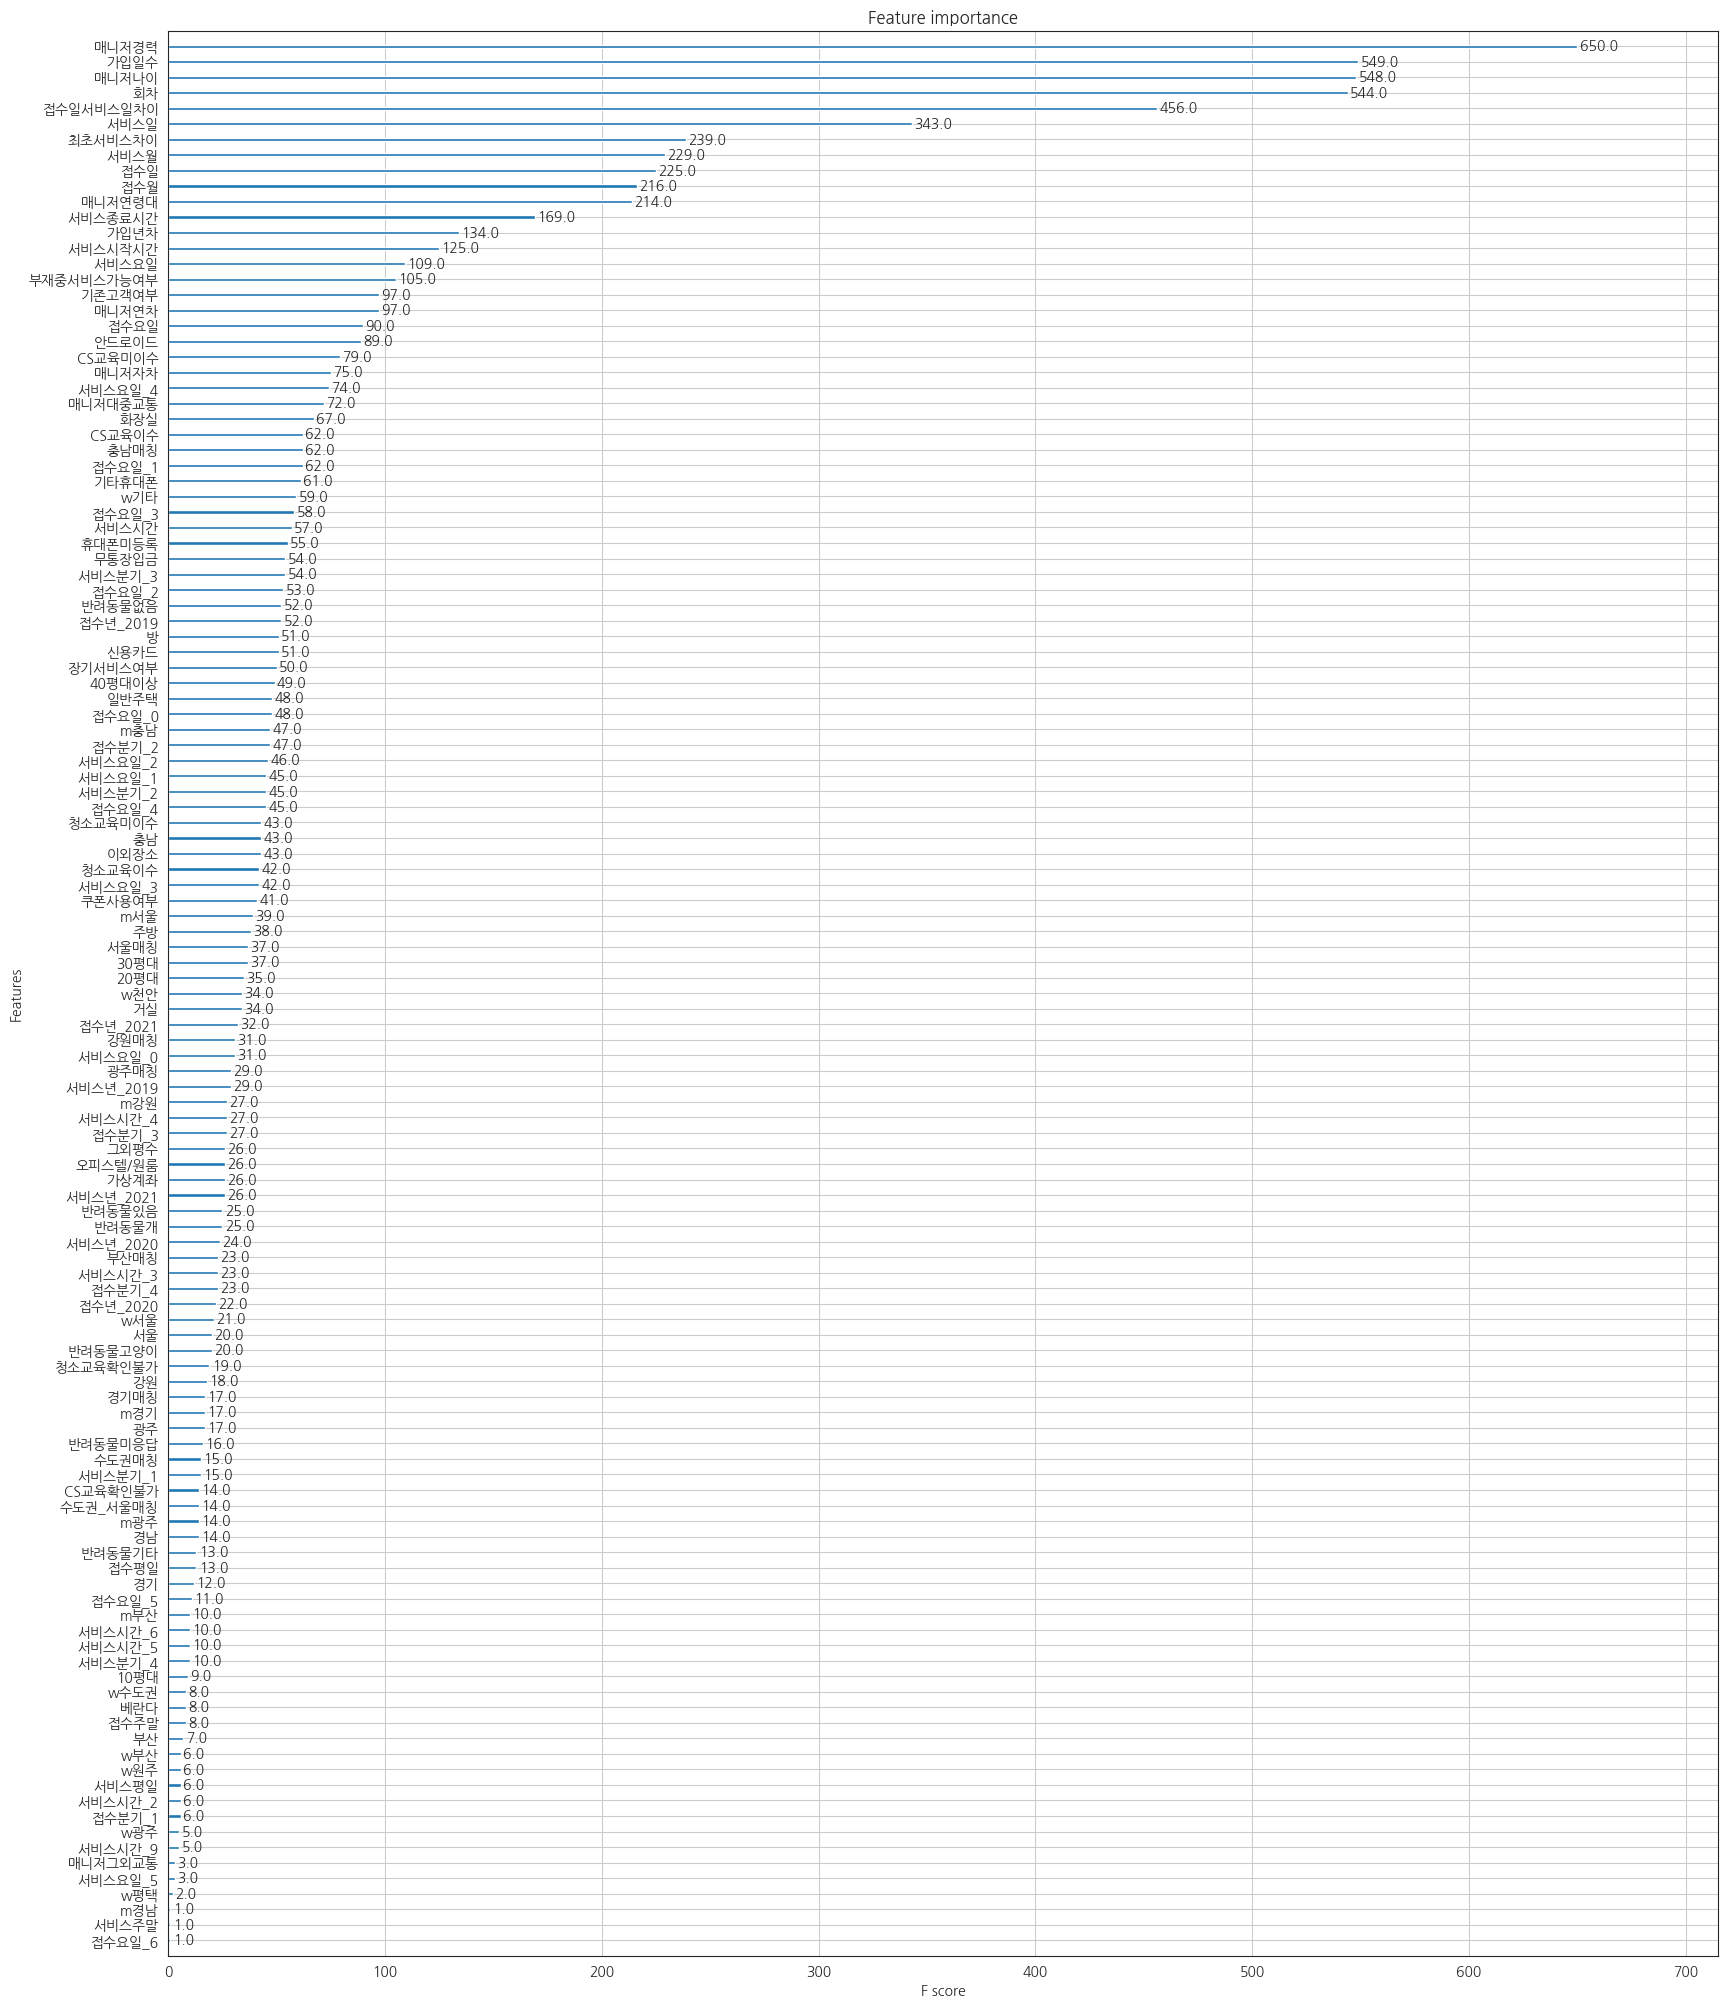

In [1078]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(20,25))
plot_importance(grid.best_estimator_, ax=ax);

In [1079]:
len(x_test)

4244

In [1080]:
pred = pd.DataFrame({'SEQ':te.SEQ, 'pred': grid.predict_proba(x_test)[:,1]})
#pred = pd.DataFrame({'SEQ':te.SEQ, 'pred': grid_lgbm.predict_proba(x_test)[:,1]})
pred

,SEQ,pred
0,T54370,0.001977
1,T47892,0.039874
2,T56637,0.027131
3,T45487,0.013442
4,T41995,0.075865
...,...,...
4239,T31589,0.122248
4240,T36236,0.045764
4241,T34729,0.017516
4242,T53830,0.024049


In [1081]:
pred.to_csv('submission.csv', index=False)